<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/qf-workshop-2021/introduction-to-machine-learning/blob/main/1_notebooks/introduction-to-machine-learning.ipynb">
        <img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
</table>

# Introduction to Machine Learning: Preprocessing

## Definitions

Raw data rarely comes in the form and shape that is necessary for the optimal
performance of a learning algorithm. On the other hand, the success of a machine learning algorithm highly depends on the quality of the data fed into the model. Real-world data is often dirty containing outliers, missing values, wrong data types, irrelevant features, or non-standardized data. The presence of any of these will prevent the machine learning model to properly learn. For this reason, transforming raw data into a useful format is an essential stage in the machine learning process. Therefore,
it is absolutely critical to ensure that we examine and preprocess a dataset before
we feed it to a learning algorithm. In this section, we will discuss the essential data
preprocessing techniques that will help us to build good machine learning models.

The topics that we will cover in this lesson are as follows:

- Removing and imputing missing values from the dataset
- Getting categorical data into shape for machine learning algorithms
- Selecting relevant features for the model construction
- Feature Normalization

## Dealing with missing data

Let's create
a simple example data frame from a comma-separated values (CSV) file to get
a better grasp of the problem:

In [20]:
import pandas as pd
from io import StringIO

csv_data = \
    '''A,B,C,D
    1.0,2.0,3.0,4.0
    5.0,6.0,,8.0
    10.0,11.0,12.0,'''
# If you are using Python 2.7, you need
# to convert the string to unicode:
# csv_data = unicode(csv_data)
df = pd.read_csv(StringIO(csv_data))
df

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


One of the easiest ways to deal with missing data is simply to remove the
corresponding features (columns) or training examples (rows) from the dataset
entirely; remember that rows with missing values can easily be dropped via the dropna method:

In [21]:
df.dropna(axis=0)

,A,B,C,D
0,1.0,2.0,3.0,4.0


Although the removal of missing data seems to be a convenient approach, it also
comes with certain disadvantages; for example, we may end up removing too
many samples, which will make a reliable analysis impossible. Or, if we remove too
many feature columns, we will run the risk of losing valuable information that our
classifier needs to discriminate between classes. In the next section, we will look
at one of the most commonly used alternatives for dealing with missing values:
interpolation techniques.

### Imputing missing values

One of the most common interpolation
techniques is mean imputation, where we simply replace the missing value with
the mean value of the entire feature column. A convenient way to achieve this is by
using the SimpleImputer class from scikit-learn, as shown in the following code:

In [22]:
from sklearn.impute import SimpleImputer
import numpy as np

imr = SimpleImputer(missing_values=np.nan, strategy='mean')
imr = imr.fit(df.values)
imputed_data = imr.transform(df.values)
imputed_data

array([[ 1. ,  2. ,  3. ,  4. ],
       [ 5. ,  6. ,  7.5,  8. ],
       [10. , 11. , 12. ,  6. ]])

Alternatively, an even more convenient way to impute missing values is by using
pandas' fillna method and providing an imputation method as an argument. For
example, using pandas, we could achieve the same mean imputation directly in the
DataFrame object via the following command:

In [23]:
df.fillna(df.mean())

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,7.5,8.0
2,10.0,11.0,12.0,6.0


## Categorical Data

When we are talking about categorical data, we have to further distinguish between
ordinal and nominal features. Ordinal features can be understood as categorical
values that can be sorted or ordered. For example, t-shirt size would be an ordinal
feature, because we can define an order: XL > L > M. In contrast, nominal features
don't imply any order and, to continue with the previous example, we could think
of t-shirt color as a nominal feature since it typically doesn't make sense to say that,
for example, red is larger than blue. Before we explore different techniques for handling such categorical data, let's create a new DataFrame to illustrate the problem:

In [24]:
import pandas as pd

df = pd.DataFrame([
    ['green', 'M', 10.1, 'class2'],
    ['red', 'L', 13.5, 'class1'],
    ['blue', 'XL', 15.3, 'class2']])
df.columns = ['color', 'size', 'price', 'classlabel']
df

,color,size,price,classlabel
0,green,M,10.1,class2
1,red,L,13.5,class1
2,blue,XL,15.3,class2


To make sure that the learning algorithm interprets the ordinal features correctly,
we need to convert the categorical string values into integers. Unfortunately, there
is no convenient function that can automatically derive the correct order of the labels
of our size feature, so we have to define the mapping manually. In the following
simple example, let's assume that we know the numerical difference between
features, for example, XL = L + 1 = M + 2:

In [25]:
size_mapping = {'XL': 3,'L': 2,'M': 1}
df['size'] = df['size'].map(size_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,class2
1,red,2,13.5,class1
2,blue,3,15.3,class2


### Encoding Class Labels

## Feature Normalization

Many machine learning algorithms require that the selected features are on
the same scale for optimal performance, this process is called "Feature Normalization" and is the subject of this paragraph.

Data Normalization is a common practice in machine learning which consists of transforming numeric columns to a common scale. In machine learning, some feature values differ from others multiple times. The features with higher values will dominate the leaning process. However, it does not mean those variables are more important to predict the outcome of the model. Data normalization transforms multiscaled data to the same scale. After normalization, all variables have a similar influence on the model, improving the stability and performance of the learning algorithm.

There are multiple normalization techniques in statistics. In this notebook, we will cover the most important ones:

- The maximum absolute scaling
- The min-max feature scaling
- The z-score method

### The maximum absolute scaling

The maximum absolute scaling rescales each feature between -1 and 1 by dividing every observation by its maximum absolute value.

$$
x_{new} = \frac{x_{old}}{\max \vert x_{old} \vert}
$$

### The min-max feature scaling

The min-max approach (often called normalization) rescales the feature to a fixed range of [0,1] by subtracting the minimum value of the feature and then dividing by the range:

$$
x_{new} = \frac{x_{old}-x_{min}}{x_{max}-x_{min}}
$$

### Z-Score

The **z-score** method (often called **standardization**) transforms the data into a distribution with a mean of 0 and a standard deviation of 1. Each standardized value is computed by subtracting the mean of the corresponding feature and then dividing by the standard deviation.

$$
x_{new} = \frac{x_{old} - \mu}{\sigma}
$$

Unlike min-max scaling, the z-score does not rescale the feature to a fixed range. The z-score typically ranges from -3.00 to 3.00 (more than 99% of the data) if the input is normally distributed.

It is important to bear in mind that z-scores are not necessarily normally distributed. They just scale the data and follow the same distribution as the original input. This transformed distribution has a mean of 0 and a standard deviation of 1 and is going to be the standard normal distribution only if the input feature follows a normal distribution.

Standardization can easily be achieved by using the built-in NumPy methods mean
and std:

In [26]:
import numpy as np

X = np.array([6, 7, 7, 12, 13, 13, 15, 16, 19, 22])

X_std = np.copy(X)
X_std = (X - X.mean()) / X.std()

print(X_std)

[-1.39443338 -1.19522861 -1.19522861 -0.19920477  0.          0.
  0.39840954  0.5976143   1.19522861  1.79284291]


Or simply using the specific function of the stats module of scipy

In [28]:
import scipy.stats as stats

stats.zscore(X)

array([-1.39443338, -1.19522861, -1.19522861, -0.19920477,  0.        ,
        0.        ,  0.39840954,  0.5976143 ,  1.19522861,  1.79284291])

Standardization is very useful with gradient descent learning. In this case
the optimizer has to go through fewer steps to find a good or optimal solution (the
global cost minimum), as illustrated in the following figure, where the subfigures
represent the cost surface as a function of two model weights in a two-dimensional
classification problem:

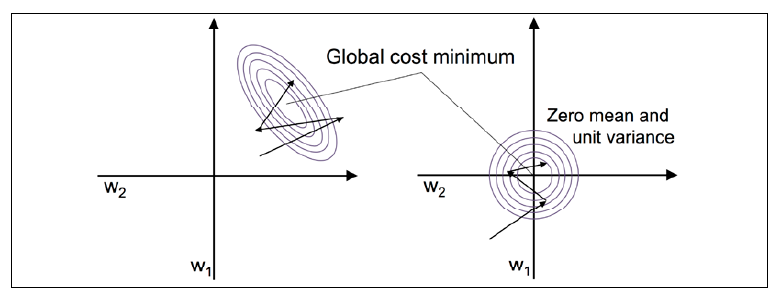